# Aula 12 - Análise exploratória de dados em Python

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Análise exploratória de dados em Python - base do Titanic

_____________

### Problema gerador: Titanic - mulheres e crianças primeiro? Jack e Rose exisrtiram?

Aprenderemos na aula de hoje o importante conceito de **análise exploratória de dados**, utilizando uma base com informações do famoso naufrágio do Titanic. 

___

## 1) Análise exploratória de dados

Uma habilidade **MUITO** importante que cientistas de dados devem ter é a de **olhar pros dados**, que quer dizer explorar os dados, ver do que eles se tratam, se habituar com eles.

Essa etapa é muitíssimo importante para que as etapas seguintes, em especial a de modelagem, funcionem adequadamente!

Dentro do jargão da área, essa etapa se chama ***Exploratory Data Analysis*** (**Análise Exploratória dos Dados**), ou simplesmente EDA. Quando dizemos "olhar pros dados", é a isso que nos referimos!

A etapa de EDA é muitíssimo importante, e deve tomar grande parte de um projeto de ciência de dados, como já discutimos, e ela comumente feita também com o auxílio de **gráficos** e outras ferramentas visuais. Faremos isso nas próximas aulas, depois que aprendermos sobre ferramentas importantíssimas de **visualização de dados** (*dataviz*).

Por hora, faremos a EDA apenas utilizando o pandas, utilizando diversos métodos e funções específicas.

Lembre-se: o objetivo é que exploremos os dados o máximo possível! 

Então, essa é a etapa em que:

- Formulamos as perguntas importantes;
- E tentamos respondê-las com base nos dados!

Vamos lá?

____
____
____

## Base de dados do Titanic

Agora exploraremos um pouco mais a fundo o dataset do <a href="https://www.kaggle.com/c/titanic">Titanic</a>.

Faremos a leitura da base, e também os primeiros passos da EDA, respondendo diversas perguntas muito interessantes.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic_completa_oficial.csv', na_values='?')

In [3]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
(df.isnull().sum()/df.shape[0])
# Porcentagem de linhas que estão nulas 
# O shape retorna uma tupla com as quantidades de linhas e colunas onde o zero são linhas e o 1 as colunas

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In [7]:
(df.isnull().sum()/df.shape[0])*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

__________________

Agora que os dados foram lidos, vamos começar a **olhar** pra eles

O que fazer com dados missing? Vamos discutir isso mais tarde!

Por enquanto, vamos continuar explorando a base

In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


A informação acima é fundamental para diferenciarmos quais colunas contêm dados **categóricos** e quais contêm dados **numéricos**

- **Dados categóricos/qualitativos**: são dados qualitativos, quase sempre expressos na forma de **strings**. Praticamente todos os modelos não conseguem lidar com dados categóricos diretamente. Por isso, se quisermos utilizá-los, teremos que fazer algum procedimento que trasnforme os dados categórios em dados numéricos. Veremos como fazer isso mais pra frente.

- **Dados numéricos**: são dados numéricos, que podemos utilizar diretamente!

In [9]:
import numpy as np

In [10]:
df.select_dtypes(exclude=np.number)

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",female,2665,NaN,C,NaN,NaN
1305,"Zabour, Miss. Thamine",female,2665,NaN,C,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",male,2656,NaN,C,NaN,NaN
1307,"Zakarian, Mr. Ortin",male,2670,NaN,C,NaN,NaN


In [11]:
df.select_dtypes(include=np.number)

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN
...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,328.0
1305,3,0,NaN,1,0,14.4542,NaN
1306,3,0,26.5000,0,0,7.2250,304.0
1307,3,0,27.0000,0,0,7.2250,NaN


____


____

Vamos analisar os dados um pouco mais!


Perfil demográfico do titanic (em termo das classes)

In [12]:
# quantas pessoas tem na base?
# metodo que nos traz linhas e colunas na forma de uma tupla
df.shape[0]

1309

In [13]:
# quais as classes?
df['pclass'].unique()


array([1, 2, 3], dtype=int64)

In [14]:
# contagem de quantos valores unicos tem na base 
df['pclass'].nunique()

3

In [15]:
# quantos valores tem em cada classe:
df['pclass'].value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [16]:
(df['pclass'].value_counts(normalize=True))*100

pclass
3    54.163484
1    24.675325
2    21.161192
Name: proportion, dtype: float64

In [17]:
# qual a distribuição de sexo?
df['sex'].unique()


array(['female', 'male'], dtype=object)

In [18]:
df['sex'].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [19]:
(df['sex'].value_counts(normalize=True))*100

sex
male      64.400306
female    35.599694
Name: proportion, dtype: float64

In [20]:
# qual a distribuição das variáveis numéricas?

df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

<Axes: ylabel='Frequency'>

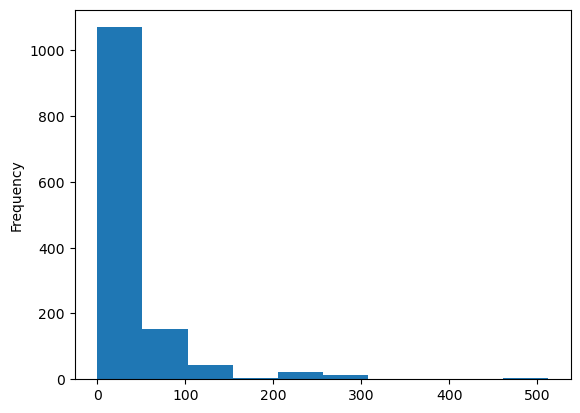

In [21]:
# Pequeno gráfico
df['fare'].plot(kind='hist')

In [22]:
# qual a taxa de sobrevivência do titanic?

df['survived'].value_counts(normalize=True)

survived
0    0.618029
1    0.381971
Name: proportion, dtype: float64

**Pergunta: qual é proporção de homens/mulheres que morreram/sobreviveram?**

In [23]:
# filtro para pegar a porcentagem de homens que sobreviveu:
df[df['sex'] == 'male']['survived'].value_counts(normalize=True)

survived
0    0.809015
1    0.190985
Name: proportion, dtype: float64

In [24]:
# filtrando a porcentagem de homens com menos de 10 anos que sobreviveram
df.query('sex == "male" and age < 10')['survived'].value_counts(normalize=True)*100

survived
1    58.139535
0    41.860465
Name: proportion, dtype: float64

In [25]:
df.query('sex == "female" and age < 10')['survived'].value_counts(normalize=True)*100

survived
1    64.102564
0    35.897436
Name: proportion, dtype: float64

In [26]:
# taxa de sobrevivencia de outra forma dos homens 
df.query('sex == "male" ')['survived'].mean()*100

19.098457888493474

**Pergunta: idem da anterior, mas com relação às classes?**

In [27]:
# primeira classe
df.query('sex == "male" and pclass == 1')['survived'].value_counts(normalize=True)*100

survived
0    65.921788
1    34.078212
Name: proportion, dtype: float64

In [28]:
df.query('sex == "male" and pclass == 2')['survived'].value_counts(normalize=True)*100

survived
0    85.380117
1    14.619883
Name: proportion, dtype: float64

In [29]:
df.query('sex == "male" and pclass == 3')['survived'].value_counts(normalize=True)*100

survived
0    84.787018
1    15.212982
Name: proportion, dtype: float64

### Groupby

O .groupby() é um método super útil que nos ajuda a construir uma **tabela dinâmica** (pivot table) com os dados.

Esse tipo de estrutura nos ajuda muito a fazer a importante etapa de **olhar pros dados**

Vamos usar esta estrutura para responder a pergunta acima!

Precisamos de uma **função de agregação**, que é qual a função que vamos aplicar aos dados agrupados.

Eu quero olhar pros valores da coluna "Survived", agrupados por "Pclass" e "Sex".

Mas que função de agregação usar?

Como a coluna "Survived" tem apenas valores binários 1 e 0, eu posso usar a média!

Ex: [1 0 0 0 0 1 1], média: 3/7 = 42.85%. Ou seja, 42.86% sobreviveram, e 57.14% morreram

In [30]:
df.groupby(['pclass','sex'])['survived'].mean()

pclass  sex   
1       female    0.965278
        male      0.340782
2       female    0.886792
        male      0.146199
3       female    0.490741
        male      0.152130
Name: survived, dtype: float64

In [31]:
df.groupby(['pclass','sex'])[['survived']].mean()*100

survived
pclass sex              
1      female  96.527778
       male    34.078212
2      female  88.679245
       male    14.619883
3      female  49.074074
       male    15.212982

In [32]:
df.groupby(['pclass','sex'])[['fare']].agg(['mean','max','min','sum'])

fare                             
                     mean       max    min         sum
pclass sex                                            
1      female  109.412385  512.3292  25.70  15755.3834
       male     69.888385  512.3292   0.00  12510.0209
2      female   23.234827   65.0000  10.50   2462.8917
       male     19.904946   73.5000   0.00   3403.7457
3      female   15.324250   69.5500   6.75   3310.0379
       male     12.415462   69.5500   0.00   6108.4073

Também é possível fazer uma pivot table através da função **pd.pivot_table()**

In [33]:
# tabela dinamica
pd.pivot_table(df, 'survived', 'pclass', 'sex',aggfunc='count')

sex,female,male
pclass,,
1,144,179
2,106,171
3,216,493


In [34]:
df['embarked'].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

Outra pergunta: **qual a relação entre o porto de embarque, a taxa de sobrevivência, e a classe?**

In [35]:
df.groupby(['embarked','pclass'])['survived'].agg(['mean', 'count'])


mean  count
embarked pclass                 
C        1       0.687943    141
         2       0.571429     28
         3       0.366337    101
Q        1       0.666667      3
         2       0.285714      7
         3       0.353982    113
S        1       0.559322    177
         2       0.417355    242
         3       0.210101    495

In [36]:
pd.pivot_table(df, 'survived', 'embarked','pclass')*100


pclass,1,2,3
embarked,,,
C,68.794326,57.142857,36.633663
Q,66.666667,28.571429,35.398230
S,55.932203,41.735537,21.010101


___
___
___

Vamos explorar um pouco mais!

Em particular, vamos responder a pergunta do problema gerador:

## *Mulheres e crianças sobreviveram mais?*

In [37]:
# quantas pessoas morreram? Quantas sobreviveram?

df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [38]:
# qual a proporção de sobreviventes e mortos?
df['survived'].value_counts(normalize=True)*100


survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

In [39]:
# qual a quantidade de pessoas de casa sexo que morreu e sobreviveu?

df.groupby(['sex'])[['survived']].mean()*100

,survived
sex,
female,72.746781
male,19.098458


In [40]:
# modifique o groupby que fizemos acima do porto e classe pra incluir também o sexo como agrupador
# esse dataframe dá uma visão bem completa!

df.groupby(['sex','embarked','pclass'])['survived'].agg(['mean','count'])

mean  count
sex    embarked pclass                 
female C        1       0.971831     71
                2       1.000000     11
                3       0.709677     31
       Q        1       1.000000      2
                2       1.000000      2
                3       0.589286     56
       S        1       0.956522     69
                2       0.870968     93
                3       0.395349    129
male   C        1       0.400000     70
                2       0.294118     17
                3       0.214286     70
       Q        1       0.000000      1
                2       0.000000      5
                3       0.122807     57
       S        1       0.305556    108
                2       0.134228    149
                3       0.144809    366

In [41]:
# agrupe agora por porto, classe, sexo e survived, e pegue as contagens de "survived"
# essa análise também dá uma visão interessante do perfil dos passageiros

df.groupby(['sex','embarked','pclass','survived'])['survived'].agg(['count'])

count
sex    embarked pclass survived       
female C        1      0             2
                       1            69
                2      1            11
                3      0             9
                       1            22
       Q        1      1             2
                2      1             2
                3      0            23
                       1            33
       S        1      0             3
                       1            66
                2      0            12
                       1            81
                3      0            78
                       1            51
male   C        1      0            42
                       1            28
                2      0            12
                       1             5
                3      0            55
                       1            15
       Q        1      0             1
                2      0             5
                3      0            50
                       1             7
       S        1      0            75
                       1            33
                2      0           129
                       1            20
                3      0           313
                       1            53

In [42]:
# inclua idade na análise
df.groupby(['sex','embarked','pclass'])['age'].agg(['count'])

count
sex    embarked pclass       
female C        1          65
                2          11
                3          22
       Q        1           2
                2           1
                3          21
       S        1          64
                2          91
                3         109
male   C        1          63
                2          13
                3          38
       Q        1           1
                2           4
                3          21
       S        1          87
                2         141
                3         290

In [43]:
df.groupby(['survived','sex','pclass'])['age'].agg(['mean','count'])

mean  count
survived sex    pclass                  
0        female 1       35.200000      5
                2       34.090909     11
                3       23.418750     80
         male   1       43.658163     98
                2       33.092593    135
                3       26.679598    290
1        female 1       37.109375    128
                2       26.711051     92
                3       20.814815     72
         male   1       36.168240     53
                2       17.449274     23
                3       22.436441     59

Podemos criar algumas novas variáveis também!

Como queremos fazer uma análise de idade, seria legal se criássemos uma coluna de **faixa etária**, não é mesmo?

Para isso, vamos conhecer o importante método `apply()`:

### Método `apply()` 

Esse método é extremamente útil para **modificar colunas** ou **criar novas colunas a partir de colunas antigas**.

O que ele faz é muito simples: **aplica uma função a todos os valores de uma série!**

In [44]:
idade = 20
def faixa_etaria(idade):
    if np.isnan(idade):
        return 'Desconhecido'
    elif idade <= 12:
        return 'Criança' 
    elif idade <= 18:
        return 'Adolescente'
    elif idade <= 65:
        return 'Adulto'
    elif idade > 65:
        return 'Idoso'

In [45]:
faixa_etaria(50)

'Adulto'

In [46]:
# quantos passageiros há em cada faixa etária? (0-15, 15-30, 30-45, 45+) (fechado superior, aberto inferior)

df['faixa_etaria'] = df['age'].apply(faixa_etaria)

In [47]:
df['faixa_etaria'].value_counts()

faixa_etaria
Adulto          843
Desconhecido    263
Adolescente      99
Criança          94
Idoso            10
Name: count, dtype: int64

Agora podemos responder algumas outras perguntas:

In [48]:
# quantos passageiros há em cada faixa etária? (0-15, 15-30, 30-45, 45+)

df['age'].apply(faixa_etaria).value_counts()

age
Adulto          843
Desconhecido    263
Adolescente      99
Criança          94
Idoso            10
Name: count, dtype: int64

In [49]:
# e qual a distribuição de sexo dentro de cada faixa etária?
df.groupby(['faixa_etaria','sex'])[['name']].count()

name
faixa_etaria sex         
Adolescente  female    48
             male      51
Adulto       female   295
             male     548
Criança      female    44
             male      50
Desconhecido female    78
             male     185
Idoso        female     1
             male       9

Note que agora fica muito mais fácil responder às perguntas que respondemos antes com filtros:

In [50]:
# e qual a proporção de mortes/sobrevivência dentro de cada faixa etária?
df.groupby(['faixa_etaria','sex'])[['survived']].agg(['count','mean'])

survived          
                       count      mean
faixa_etaria sex                      
Adolescente  female       48  0.750000
             male         51  0.098039
Adulto       female      295  0.772881
             male        548  0.186131
Criança      female       44  0.613636
             male         50  0.540000
Desconhecido female       78  0.602564
             male        185  0.140541
Idoso        female        1  1.000000
             male          9  0.111111

___
___
___

Agora que conhecemos o apply, vamos trabalhar com a coluna de nomes, que até agora não usamos, mas que pode conter informações importantes...

Primeiramente, vamos dar uma olhada na coluna de nomes:

In [51]:
df["name"]

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

Note que a estrutura dos nomes é:

**Sobrenome, Título. Primeiros Nomes**

Será que conseguimos extrair uma coluna **só com os sobrenomes?**

E outra coluna **só com os títulos?**

Vamos ver...

In [52]:
string = "Sobrenome, Título. Primeiros Nomes"

string

'Sobrenome, Título. Primeiros Nomes'

In [53]:
string.split(',')[0]

'Sobrenome'

In [54]:
string.split(", ")[1].split('.')

['Título', ' Primeiros Nomes']

In [55]:
# extração de sobrenome
def sobrenome(nome):
    return nome.split(',')[0]

# extrai titulo
def titulo(title):
    return title.split(", ")[1].split('. ')[0]

In [56]:
df['name'].apply(titulo)

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: name, Length: 1309, dtype: object

In [57]:
df['name'].apply(lambda x : x.split(',')[0])

0           Allen
1         Allison
2         Allison
3         Allison
4         Allison
          ...    
1304       Zabour
1305       Zabour
1306     Zakarian
1307     Zakarian
1308    Zimmerman
Name: name, Length: 1309, dtype: object

Parece que funcionou!

Agora, como podemos **aplicar** esse mesmo procedimento simultaneamente a todos os elementos da coluna de nomes?

Fazemos isso com o método `apply()`.

Podemos definir uma função que faz o que queremos, ou então, de forma mais simples, usar **funções lambda**!

Basta pegar a ação que fizemos (que é essencialmente o ".split(",")[0]"), e passar pra função lambda dentro do apply:

Note que foi retornada uma outra série, mas dessa vez apenas com os sobrenomes!

Podemos fazer com que essa série se torne uma nova coluna do df:


In [58]:
# utilizando o apply pra criar colunas de titulo e sobrenome (veja acima!!)

df["sobrenome"] = df["name"].apply(sobrenome)
df["title"] = df["name"].apply(titulo)

In [59]:
df[["sobrenome","title"]]

,sobrenome,title
0,Allen,Miss
1,Allison,Master
2,Allison,Miss
3,Allison,Mr
4,Allison,Mrs
...,...,...
1304,Zabour,Miss
1305,Zabour,Miss
1306,Zakarian,Mr
1307,Zakarian,Mr


In [60]:
df["name"].nunique()

1307

In [61]:
df["sobrenome"].nunique()

875

In [62]:
df["sobrenome"].value_counts()

sobrenome
Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Myles         1
Nesson        1
Nicholls      1
Norman        1
Zimmerman     1
Name: count, Length: 875, dtype: int64

In [63]:
df["sobrenome"].value_counts().values

array([11, 11,  8,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,
        5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [64]:
df["sobrenome"].value_counts().value_counts()

count
1     637
2     133
3      63
4      22
6       9
5       6
11      2
8       2
7       1
Name: count, dtype: int64

In [65]:
df["title"].nunique()

18

In [66]:
df["title"].value_counts()

title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: count, dtype: int64

In [67]:
df[df["title"] == "Jonkheer"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,faixa_etaria,sobrenome,title
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands",Adulto,Reuchlin,Jonkheer


In [68]:
df[~df["title"].isin(["Mr", "Miss", "Mrs", "Master", "Rev", "Dr", "Col"])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,faixa_etaria,sobrenome,title
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Adulto,Aubart,Mme
45,1,0,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,NaN,NaN,"Washington, DC",Adulto,Butt,Major
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI",Idoso,Crosby,Capt
99,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris,Adulto,Duff Gordon,Lady
100,1,1,"Duff Gordon, Sir. Cosmo Edmund ('Mr Morgan')",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris,Adulto,Duff Gordon,Sir
199,1,1,"Mayne, Mlle. Berthe Antonine ('Mrs de Villiers')",female,24.0,0,0,PC 17482,49.5042,C90,C,6,NaN,"Belgium Montreal, PQ",Adulto,Mayne,Mlle
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,8,NaN,NaN,Adulto,Oliva y Ocana,Dona
231,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,6,NaN,"Toronto, ON",Adulto,Peuchen,Major
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,NaN,NaN,"Rotterdam, Netherlands",Adulto,Reuchlin,Jonkheer
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,8,NaN,"London Vancouver, BC",Adulto,Rothes,the Countess


Essas pessoas existiram!

<a href=https://en.wikipedia.org/wiki/Manuel_Uruchurtu_Ram%C3%ADrez>Manuel Uruchurtu</a>

<a href=https://www.encyclopedia-titanica.org/titanic-victim/edward-gifford-crosby.html>Edward Crosby</a>

<a href=https://www.themarysue.com/the-countess-of-rothes/>Countess of Rothes</a>

Vamos ver alguns religiosos...

In [69]:
df[df["title"] == "Rev"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,faixa_etaria,sobrenome,title
335,2,0,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,NaN,174.0,"Jacksonville, FL",Adulto,Bateman,Rev
357,2,0,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,NaN,NaN,London,Adulto,Byles,Rev
366,2,0,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,NaN,NaN,London,Adulto,Carter,Rev
431,2,0,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,NaN,NaN,"Denmark Hill, Surrey / Chicago",Adulto,Harper,Rev
472,2,0,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,NaN,NaN,"Glasgow / Bangor, ME",Adulto,Kirkland,Rev
476,2,0,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.000,NaN,S,NaN,NaN,"Minneapolis, MN",Adulto,Lahtinen,Rev
507,2,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,NaN,NaN,"Worcester, MA",Adulto,Montvila,Rev
532,2,0,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.000,NaN,S,NaN,NaN,NaN,Adulto,Peruschitz,Rev


Este processo que fizemos é o chamado **feature engineering**, que consiste em utilizar features originais (nome) para criar **novas features** que possivelment podem ser mais úteis que a feature original.

Isto é, o nome completo de uma pessoa, pode não ser um indicativo tão forte da morte/sobrevivência... Mas o título, pode ser que seja!

_______

## *Rose e Jack estão na base?*

In [70]:
# selecionar todas as Roses da base

df[df["name"].apply(lambda x: "Rose" in x)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,faixa_etaria,sobrenome,title
242,1,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C,11,NaN,"Paris, France",Adulto,Rosenbaum,Miss
243,1,0,"Rosenshine, Mr. George ('Mr George Thorne')",male,46.0,0,0,PC 17585,79.2000,NaN,C,NaN,16.0,"New York, NY",Adulto,Rosenshine,Mr
612,3,1,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,13,NaN,"London, England Norfolk, VA",Adolescente,Aks,Mrs


In [71]:
df[df["name"].apply(lambda x: "Jack" in x)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,faixa_etaria,sobrenome,title
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,NaN,NaN,"Philadelphia, PA",Desconhecido,Brewe,Dr


In [72]:
df.query("sex == 'female' and pclass == 1 and 17 <= age <= 20")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,faixa_etaria,sobrenome,title
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Adolescente,Astor,Mrs
27,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,7,NaN,"Dowagiac, MI",Adulto,Bishop,Mrs
92,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S,3,NaN,"Calgary, AB",Adolescente,Dick,Mrs
137,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3,NaN,"Greenwich, CT",Adulto,Graham,Miss
198,1,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,113773,53.1000,D30,S,10,NaN,"New York, NY",Adolescente,Marvin,Mrs
216,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,5,NaN,"New York, NY",Adulto,Newsom,Miss
229,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,8,NaN,"Madrid, Spain",Adolescente,Penasco y Castellana,Mrs
250,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY",Adolescente,Ryerson,Miss
270,1,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S,6,NaN,"Huntington, WV",Adolescente,Smith,Mrs
289,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S,8,NaN,"New York, NY",Adolescente,Taussig,Miss


In [84]:
df.query('sex == "male" and pclass == 3 and 17 <= age <= 20 ')['name'].nunique()

50

____

Agora que terminamos de processar a base, seria interessante salvá-la para que não perdêssesmos as alteracões que fizemos.

O pandas permite salvar os arquivos com uma única linha de código!

In [73]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,faixa_etaria,sobrenome,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Adulto,Allen,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Criança,Allison,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Criança,Allison,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Adulto,Allison,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Adulto,Allison,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Adolescente,Zabour,Miss
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Desconhecido,Zabour,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Adulto,Zakarian,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Adulto,Zakarian,Mr


Para salvar o arquivo em formato ".csv":

In [74]:
df.to_csv("titanic_processada.csv", index=False)

Se quiser salvar como um arquivo de excel:

In [75]:
df.to_excel("titanic_processada.xlsx")

___


______
_____
___